 **Machine Learning Classification for Predicting Heart Failure Mortality using Clinical Data:**

Paper Link:

Its the paper of 2020

https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

About Dataset:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Imported All the necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

**Read the Data set and store it in a pandas Data Frame :**

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

**Exploratory Data Analysis:**

In [4]:
#Display the dimension of the dataset:
df.shape

(299, 13)

In [5]:
#Display the column names of dataset:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
#print the first ten rows of the data frame:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
#Print the Data types of the columns :
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
#Display the general Statistics about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
#Display the general Statistics about the dataset:
df.describe(include = 'all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
#Check are there any missing values in the columns of data frame:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [11]:
#Count the missing values in the columns of the data frame:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Univariate Analysis:**

In [12]:
#Value counts for DEATH_EVENT column:
ValueCounts_DEATH_EVENT = df['DEATH_EVENT'].value_counts()
ValueCounts_DEATH_EVENT

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

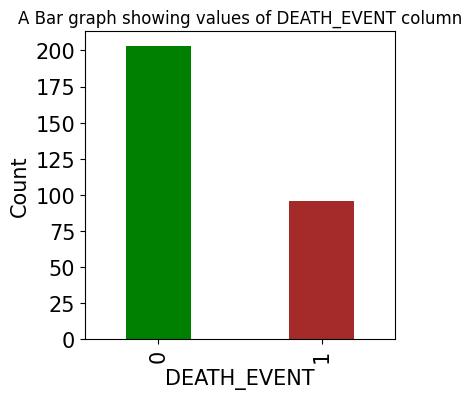

In [16]:
#A Bar graph showing values of DEATH_EVENT column:
ax = ValueCounts_DEATH_EVENT.plot(kind='bar',figsize=(4,4), width=0.40 ,color=['green','brown'] ,fontsize=15, title='A Bar graph showing values of DEATH_EVENT column' )
ax.set_xlabel("DEATH_EVENT",fontsize=15)      
ax.set_ylabel("Count",fontsize=15)
plt.show()

/tmp/ipykernel_42/3406906390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], hist=True, kde=False,


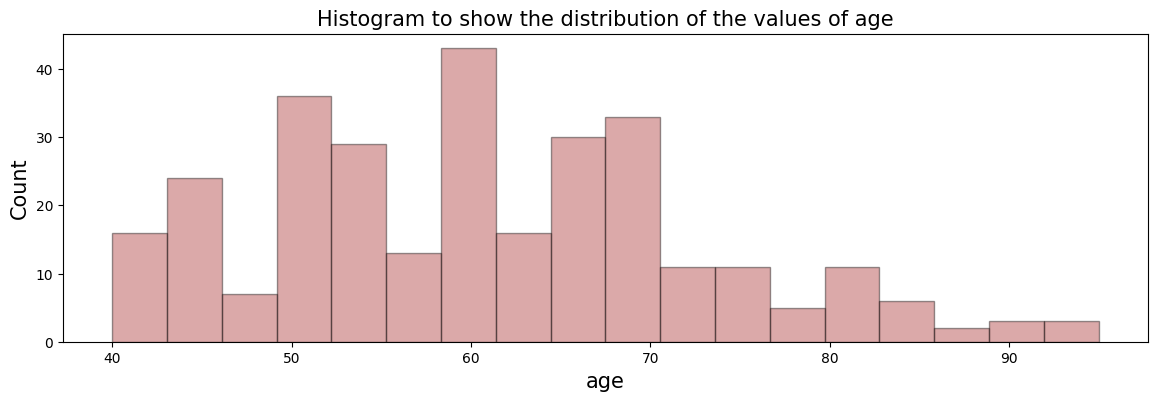

In [17]:
#Histogram to show the distribution of the values of age:
plt.figure(figsize = (14,4))
ax = sns.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/10), color = 'brown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('age', fontsize = 15)
ax.set_title('Histogram to show the distribution of the values of age', fontsize = 15)
plt.show()

/tmp/ipykernel_42/314667212.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['creatinine_phosphokinase'], hist=True, kde=False,


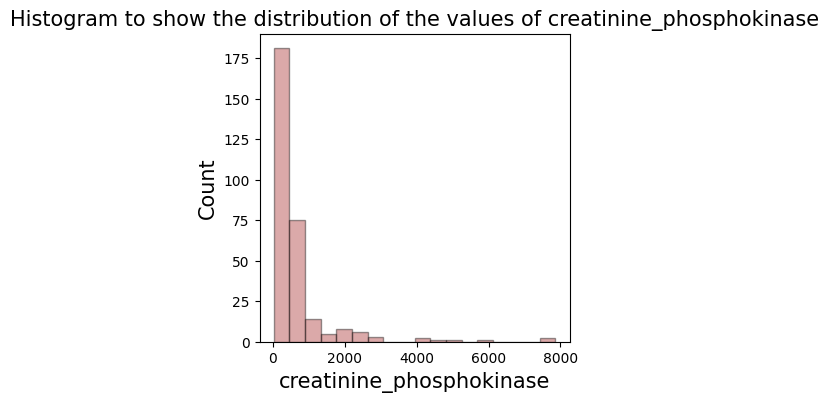

In [18]:
#Histrogram graph to show Percentage of creatinine_phosphokinase:
plt.figure(figsize = (4,4))
ax = sns.distplot(df['creatinine_phosphokinase'], hist=True, kde=False, 
             bins=int(180/10), color = 'brown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('creatinine_phosphokinase', fontsize = 15)
ax.set_title('Histogram to show the distribution of the values of creatinine_phosphokinase', fontsize = 15)
plt.show()

/tmp/ipykernel_42/1752341762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['platelets'], hist=True, kde=False,


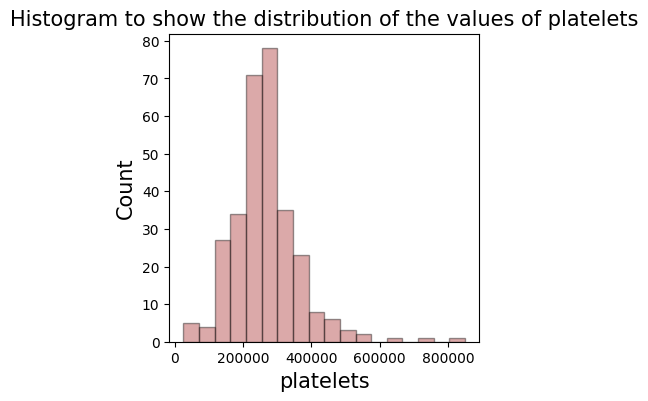

In [19]:
#Histrogram graph to show Percentage of platelets:
plt.figure(figsize = (4,4))
ax = sns.distplot(df['platelets'], hist=True, kde=False, 
             bins=int(180/10), color = 'brown', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('platelets', fontsize = 15)
ax.set_title('Histogram to show the distribution of the values of platelets', fontsize = 15)
plt.show()

**Multivariate Analysis:**

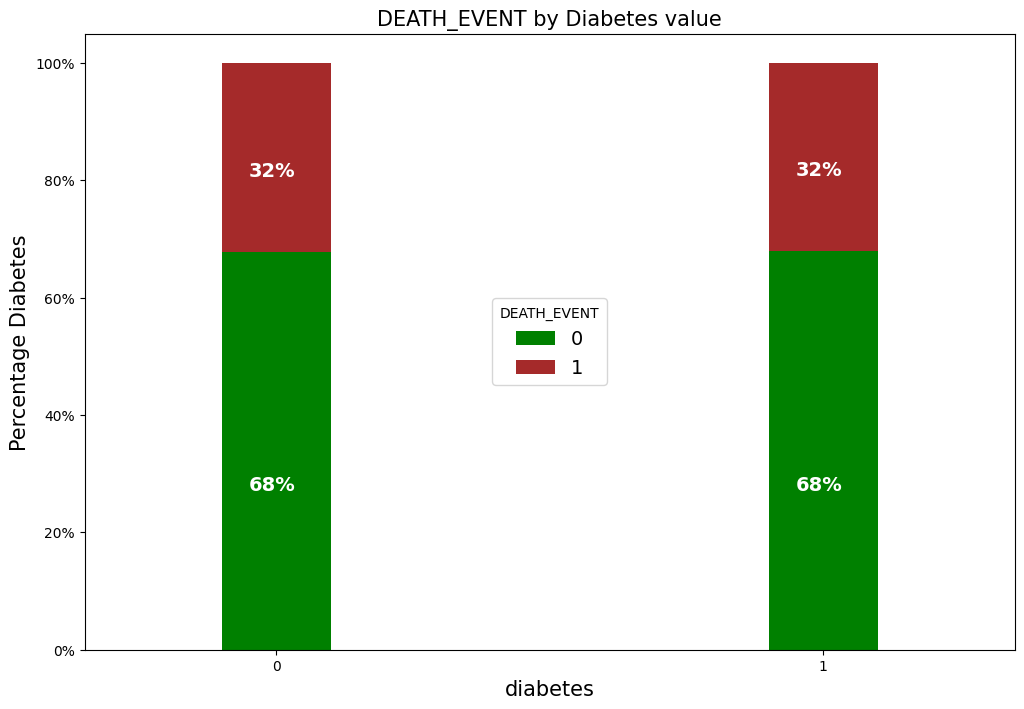

In [20]:
#A stacked bar graph to show the DEATH_EVENT by Diabetes value:
colors = ['green','brown']
Diabetes_label = df.groupby(['diabetes','DEATH_EVENT']).size().unstack()
ax = (Diabetes_label.T*100.0 / Diabetes_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'DEATH_EVENT')
ax.set_ylabel('Percentage Diabetes', fontsize = 15)
ax.set_xlabel('diabetes',  fontsize = 15)
ax.set_title('DEATH_EVENT by Diabetes value', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

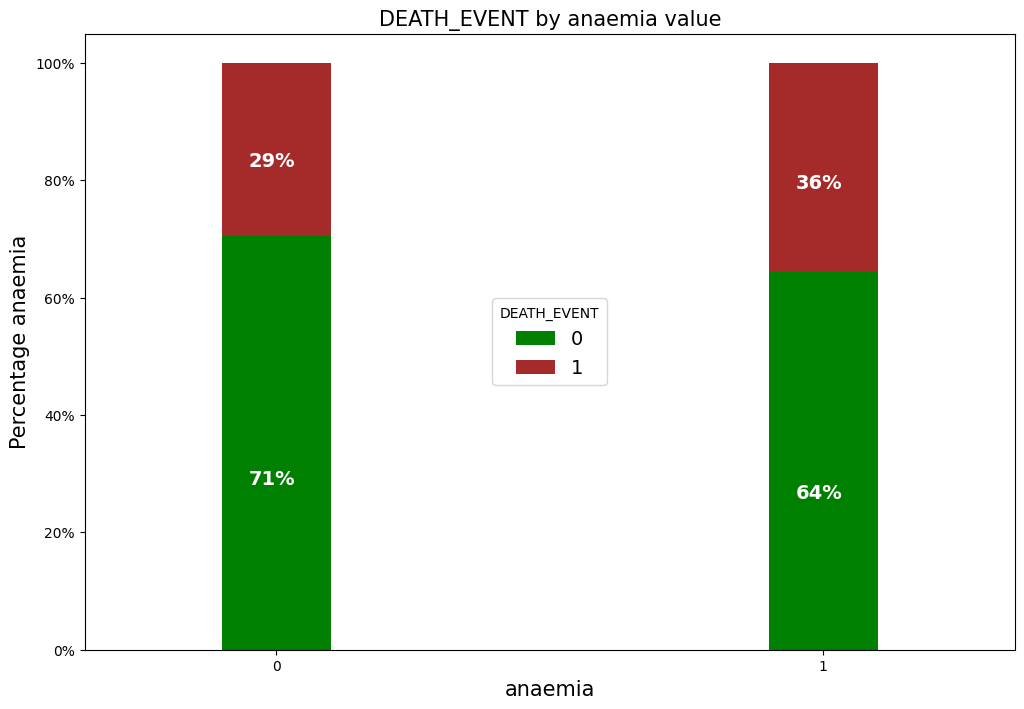

In [21]:
#A stacked bar graph to show the DEATH_EVENT by anaemia value:
colors = ['green','brown']
anaemia_label = df.groupby(['anaemia','DEATH_EVENT']).size().unstack()
ax = (anaemia_label.T*100.0 / anaemia_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'DEATH_EVENT')
ax.set_ylabel('Percentage anaemia', fontsize = 15)
ax.set_xlabel('anaemia',  fontsize = 15)
ax.set_title('DEATH_EVENT by anaemia value', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

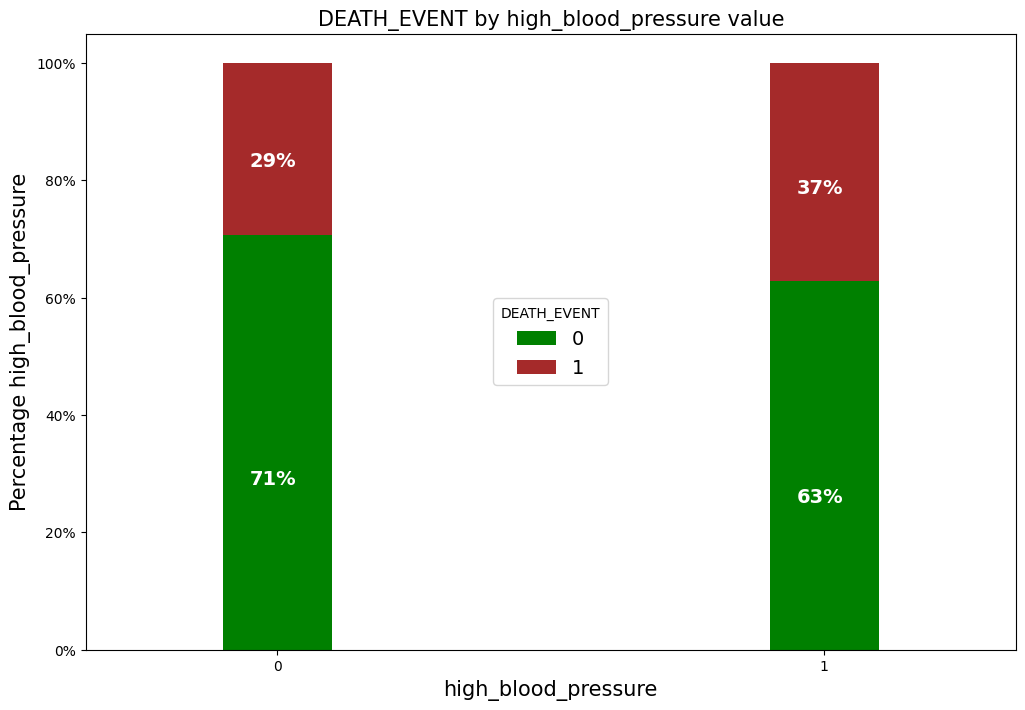

In [22]:
#A stacked bar graph to show the DEATH_EVENT by high_blood_pressure value:
colors = ['green','brown']
high_blood_pressure_label = df.groupby(['high_blood_pressure','DEATH_EVENT']).size().unstack()
ax = (high_blood_pressure_label.T*100.0 / high_blood_pressure_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'DEATH_EVENT')
ax.set_ylabel('Percentage high_blood_pressure', fontsize = 15)
ax.set_xlabel('high_blood_pressure',  fontsize = 15)
ax.set_title('DEATH_EVENT by high_blood_pressure value', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

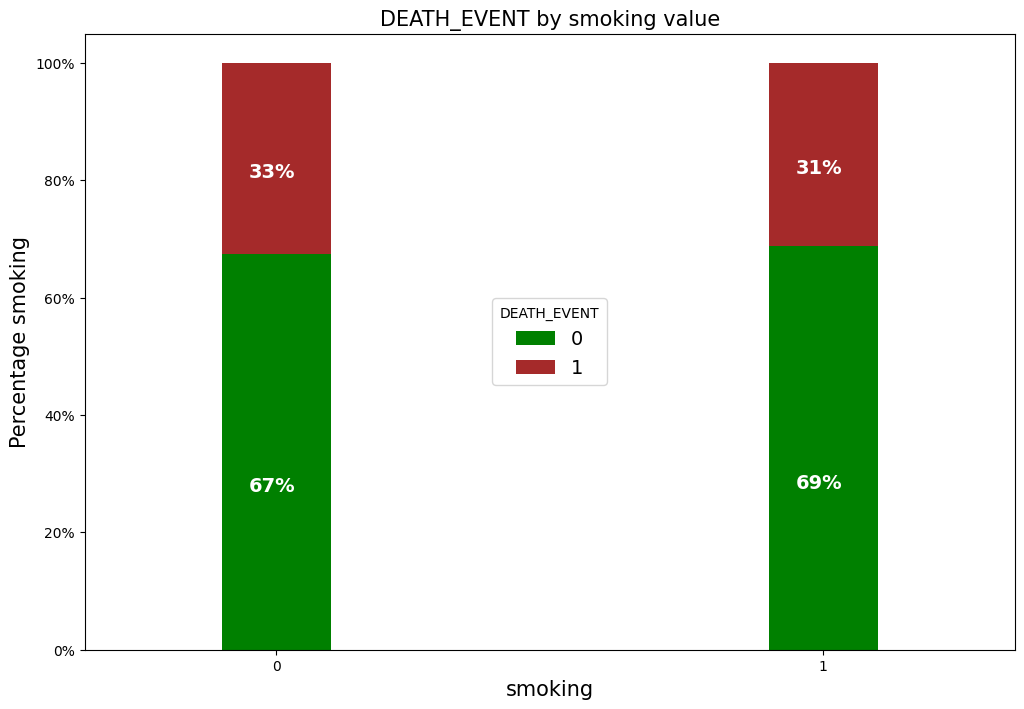

In [23]:
#A stacked bar graph to show the DEATH_EVENT by smoking value:

colors = ['green','brown']
smoking_label = df.groupby(['smoking','DEATH_EVENT']).size().unstack()
ax = (smoking_label.T*100.0 / smoking_label.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'DEATH_EVENT')
ax.set_ylabel('Percentage smoking', fontsize = 15)
ax.set_xlabel('smoking',  fontsize = 15)
ax.set_title('DEATH_EVENT by smoking value', fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [24]:
#Separate the Discrete and Continuous features:
discrete_features = [feature for feature in df.columns if df[feature].dtype == 'int64' and len(df[feature].unique())<100]
continuous_features = [feature for feature in df.columns if df[feature].dtype == 'float64' or feature not in discrete_features]

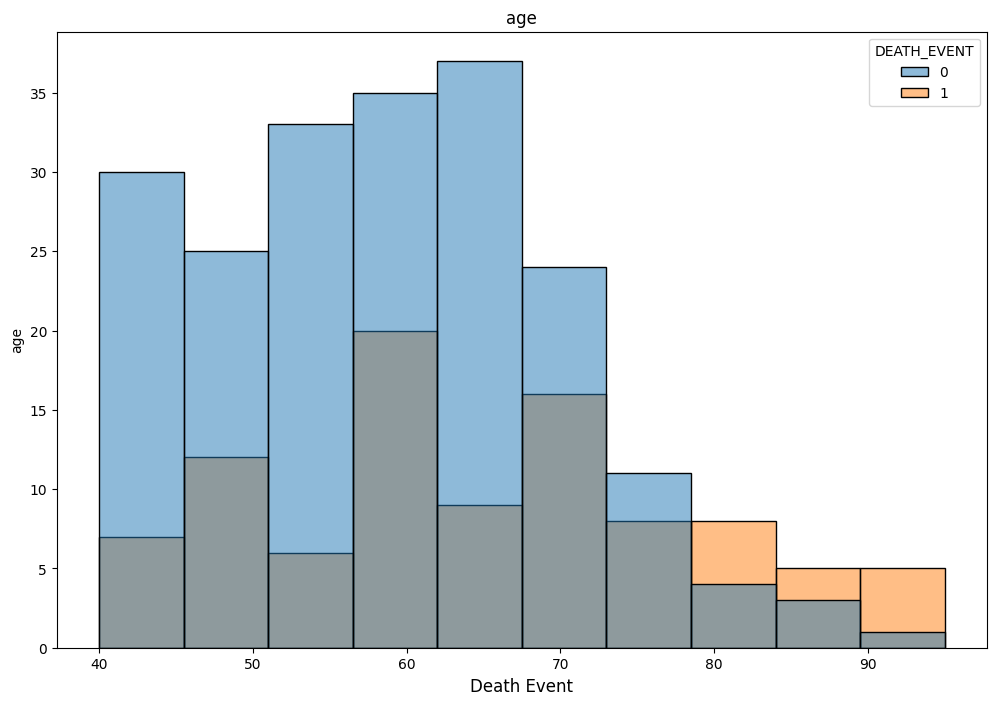

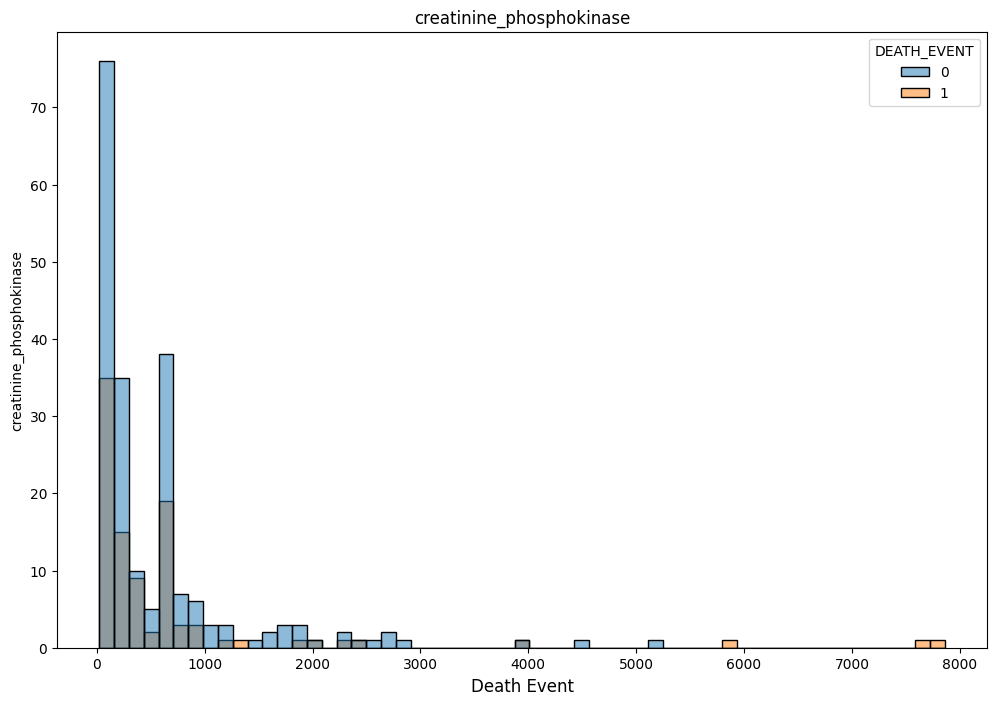

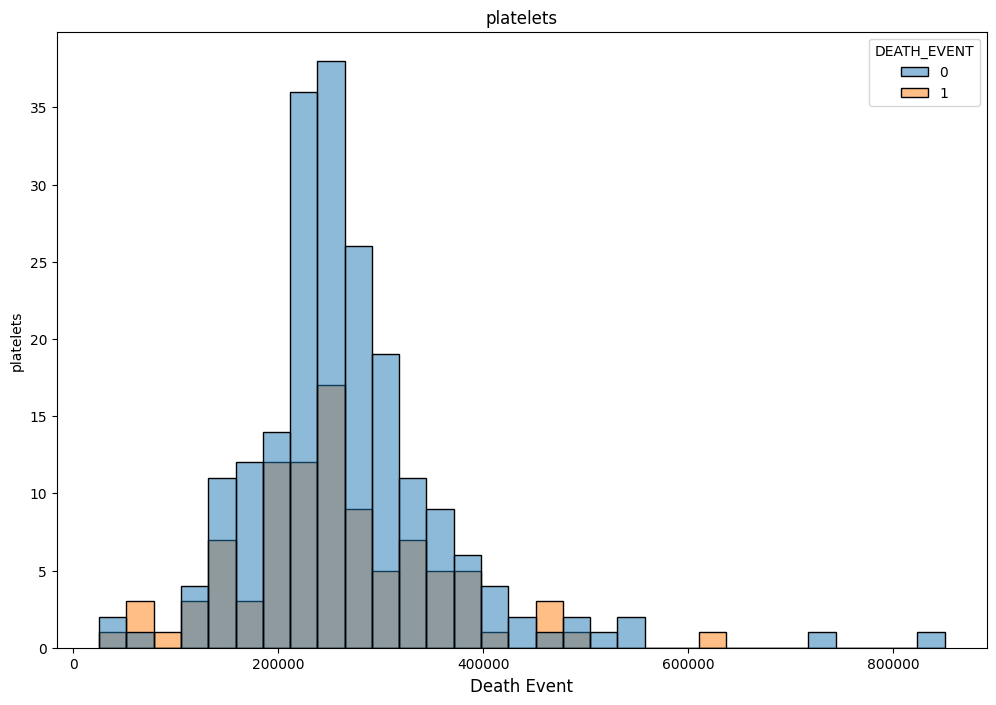

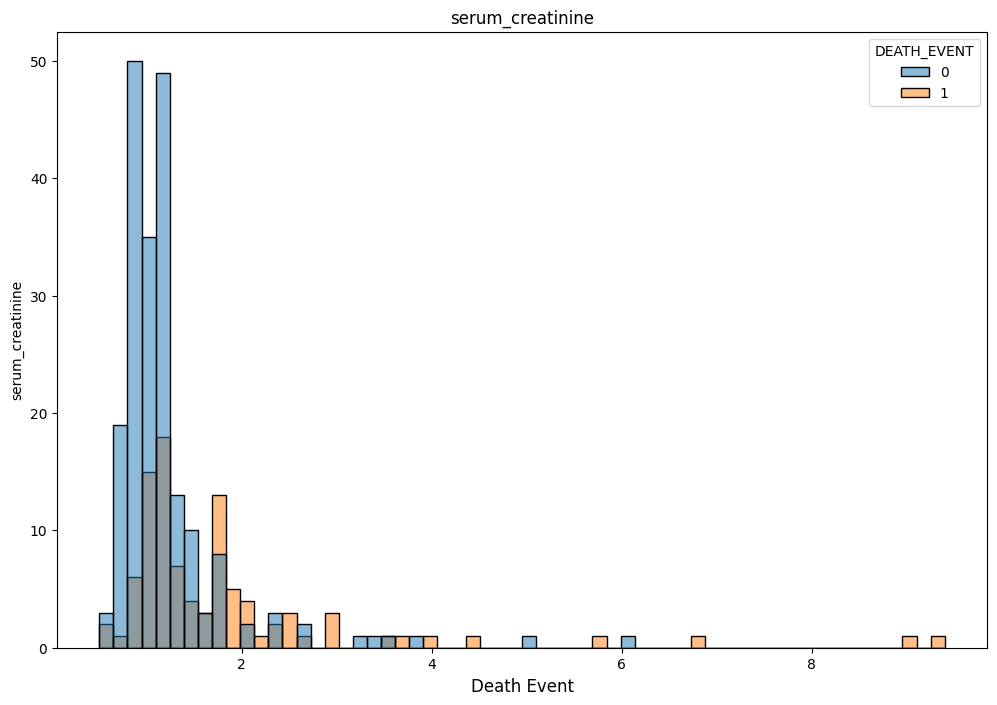

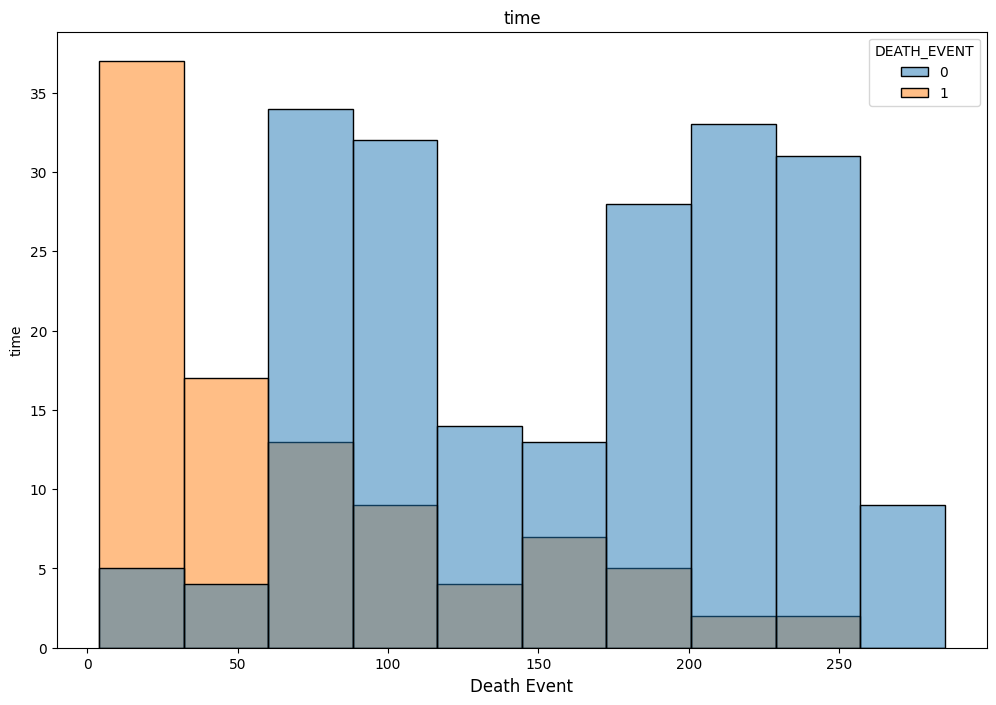

In [25]:
#Plot for all the continuous features with respect to DEATH_EVENT:
for feature in continuous_features:
    plt.figure(figsize = (12,8))
    sns.histplot(x=feature, data=df, hue='DEATH_EVENT', )
    plt.title(feature)
    plt.xlabel('Death Event', fontsize = 12)
    plt.ylabel(feature)
    plt.show()

In [26]:
#Display the correlation of response (label) variable with all other features: 
abs(df[df.columns[1:]].corr()['DEATH_EVENT'][:].sort_values(ascending = False))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                    0.001943
sex                         0.004316
smoking                     0.012623
platelets                   0.049139
serum_sodium                0.195204
ejection_fraction           0.268603
time                        0.526964
Name: DEATH_EVENT, dtype: float64

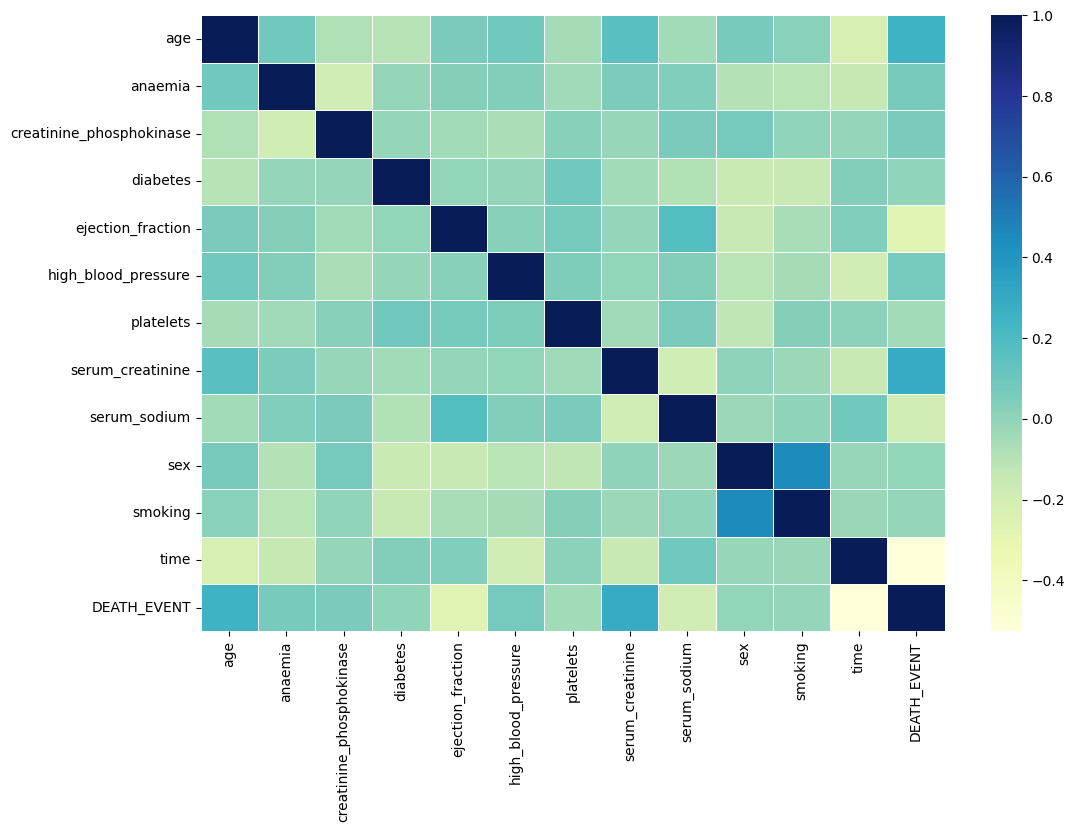

In [27]:
#Display the heatmap to show the correlation of feautres: 
 # Find correlation
corr = df.corr()

# plot the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        linewidth=0.5,
        yticklabels=corr.columns,
           cmap="YlGnBu")
plt.show()

In [28]:
#Store Features into a feature matrix X and Response variable into a response vector y:
#Features
#loc[what rows, what cols]
X = df.loc[:,df.columns != 'DEATH_EVENT']
#Response
y = df['DEATH_EVENT']

In [29]:
#Use SMOTE to handle class imbalance in dataset:
from imblearn.over_sampling import SMOTE
s = SMOTE()
X_, y_= s.fit_resample(X,y)

In [30]:
#CHeck the class values counts, now we have class values equally distributed:
from collections import Counter
print(Counter(y_))

Counter({1: 203, 0: 203})


**Modelling: Classification Techniques:**

In [31]:
#Divide the dataset into training set and testing set (80 percent train and 20 percent test): 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ , y_,  test_size=0.20, random_state=42)  

In [32]:
#Scaled the dataset using StandardScaler: 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

> Logistic Regression Model:

**Logistic Regression Model:**

In [33]:
#Fit the Logistic Regression model on training set and make prediction on testing set: 
#Initialize the model
Lg_classifier = LogisticRegression()
# Fit the model on training set
Lg_classifier.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_lg = Lg_classifier.predict(X_test_scaled)

In [34]:
#Evaluate the Logistic Regression model using accuracy score:
accu_lg = accuracy_score(y_pred_lg, y_test)

# Print the prediction accuracy
print('Test Accuracy Logistic Regression :', accu_lg)

Test Accuracy Logistic Regression : 0.8658536585365854


Axes(0.125,0.11;0.775x0.77)


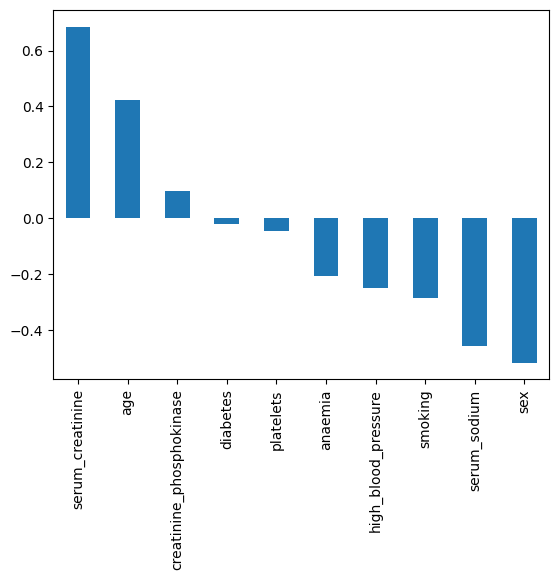

In [35]:
#To get the weights of all the variables Logistic Regression: 
weights = pd.Series(Lg_classifier.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


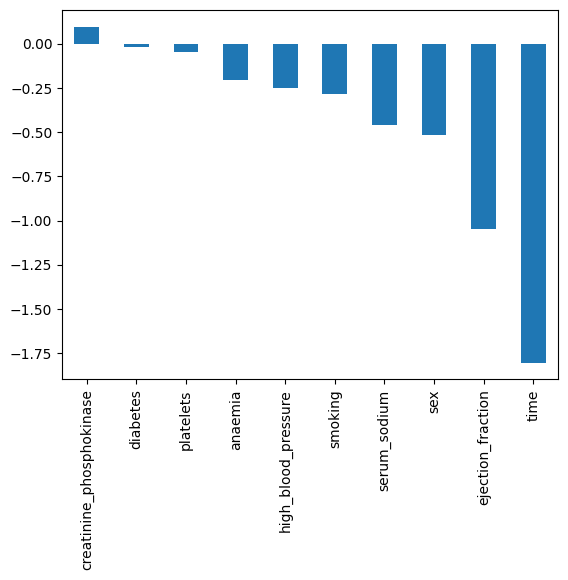

In [36]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Decision Tree Classifier:**

In [37]:
#Fit the Decision Tree Classifier on training set and make prediction on testing set: 

Dt_classifier = DecisionTreeClassifier(max_depth = 3)
Dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = Dt_classifier.predict(X_test_scaled)

In [38]:
#Evaluate the Decision Tree Classifier using accuracy score:

accu_dt = accuracy_score(y_pred_dt, y_test)
# Print the prediction accuracy
print('Test Accuracy Decision Tree Classifier :', accu_dt)

Test Accuracy Decision Tree Classifier : 0.8170731707317073


**K-nearest Neighbour Classifier:**

In [39]:
#Fit the K-nearest Neighbour Classifier on training set and make prediction on testing set: 

Knn_classifier = KNeighborsClassifier(n_neighbors=100)
Knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = Knn_classifier.predict(X_test_scaled)

In [40]:
#Evaluate the K-nearest Neighbour Classifier using accuracy score: 
accu_knn = accuracy_score(y_pred_knn, y_test)

# Print the prediction accuracy
print('Test accuracy K-nearest Neighbour Classifier :', accu_knn)

Test accuracy K-nearest Neighbour Classifier : 0.8292682926829268


***Create two lists of model name and respective Accuracies: ***

In [41]:
Default_Accuracies = pd.Series([accu_lg, accu_dt, accu_knn ])
Model_Names = ['Logistic Regression','DecisionTree Classifier','KNN Classifier']

***Comparision of Models in terms evaluation metric (Accuracy): ***

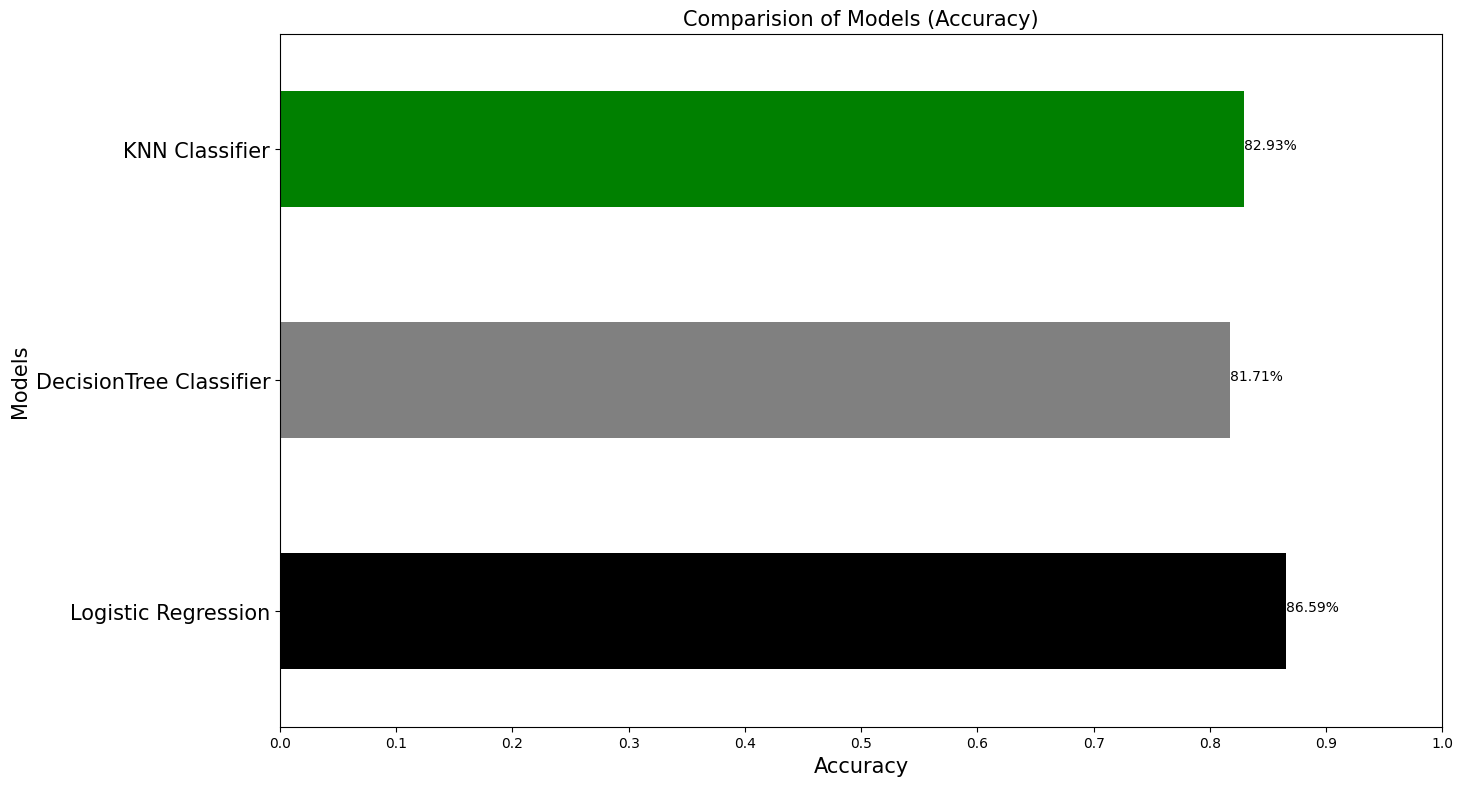

In [42]:
ax = Default_Accuracies.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (Accuracy)',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(Default_Accuracies)];
plt.show()

**Hence from the above comparison of the models in terms of accuracy we can see that Logistic Regression model out performed all the other models by giving the highest accuracy of 86.59% and KNN model comes at second position by giving an accuracy score of 82.93%.¶**